In [114]:
# Import Libraries
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt

#show plot in notebook
%matplotlib inline 

#limits amount of lines pandas prints out
from pandas import set_option 
set_option('display.max_rows', 10)

# Importing and Cleaning Data

In [115]:
#Loading the main dataset from excel into python, specified taking data from the 'Sales' sheet
Sales_df = pd.read_excel('Sales Data11.xlsm', sheetname = 'Sales')
Sales_df

,Exchange Rate,Customer,Field,Date of Order,Total Sales,Year of First Order,New/Returning Customer
0,1.2563,3M Maplewood,solutions provider,2015-04-13,3267.00,2009,Returning
1,1.2188,ABB Australia Pty Limited,engine technology,2015-05-21,480.00,2008,Returning
2,1.1800,Accutech Instrumentation,distributor,2015-01-13,18990.40,2013,Returning
3,1.0000,Advanced Engine Technology,engine technology,2015-06-23,7330.92,2008,Returning
4,1.1894,Agronova,food,2015-01-12,1746.00,2005,Returning
...,...,...,...,...,...,...,...
747,1.0000,Weatherford,oil & gas,2014-03-18,1736.47,2013-11-01 00:00:00,New
748,1.0000,Weatherford,oil & gas,2014-03-19,1803.00,2013-11-01 00:00:00,New
749,1.0000,Weatherford,oil & gas,2014-05-02,213.00,2013-11-01 00:00:00,New
750,1.0000,Weatherford,oil & gas,2014-05-02,3462.00,2013-11-01 00:00:00,New


In [116]:
# Renaming the columns 
Sales_df.columns = [['Exchange_Rate', 'Customer', 'Field', 'Date_of_Order', 'Total_Sales', 'Year_of_First_Order', 'New_or_Returning']]

In [120]:
# Replacing the empty values in the Exchange Rate column with 1. 
Sales_df1 = Sales_df[['Exchange_Rate', 'Customer', 'Field', 'Date_of_Order', 'Total_Sales', 'Year_of_First_Order', 'New_or_Returning']].replace([None], [1])
Sales_df1.head()

,Exchange_Rate,Customer,Field,Date_of_Order,Total_Sales,Year_of_First_Order,New_or_Returning
0,1.2563,3M Maplewood,solutions provider,2015-04-13,3267.00,2009,Returning
1,1.2188,ABB Australia Pty Limited,engine technology,2015-05-21,480.00,2008,Returning
2,1.1800,Accutech Instrumentation,distributor,2015-01-13,18990.40,2013,Returning
3,1.0000,Advanced Engine Technology,engine technology,2015-06-23,7330.92,2008,Returning
4,1.1894,Agronova,food,2015-01-12,1746.00,2005,Returning


In [121]:
# Creating a new column in the data set, which puts all sales amounts in Canadian dollars. 
Sales_df1['Sales_in_CAD'] = Sales_df1['Exchange_Rate'] * Sales_df1['Total_Sales'] 
Sales_df1.head()

,Exchange_Rate,Customer,Field,Date_of_Order,Total_Sales,Year_of_First_Order,New_or_Returning,Sales_in_CAD
0,1.2563,3M Maplewood,solutions provider,2015-04-13,3267.00,2009,Returning,4104.3321
1,1.2188,ABB Australia Pty Limited,engine technology,2015-05-21,480.00,2008,Returning,585.0240
2,1.1800,Accutech Instrumentation,distributor,2015-01-13,18990.40,2013,Returning,22408.6720
3,1.0000,Advanced Engine Technology,engine technology,2015-06-23,7330.92,2008,Returning,7330.9200
4,1.1894,Agronova,food,2015-01-12,1746.00,2005,Returning,2076.6924


# PLOT 1: Resampling data to make a plot that compares money spent on ads per month to sales coming from new customers & number of new customers.

In [124]:
# Deleting all rows of sales from returning customers
New_customers = Sales_df1[Sales_df.New_or_Returning != 'Returning ']
New_customers

,Exchange_Rate,Customer,Field,Date_of_Order,Total_Sales,Year_of_First_Order,New_or_Returning,Sales_in_CAD
228,1.2524,Advanced Analytical Technologies,chemical,2015-01-29,754.00,2015,New,944.30960
229,1.2457,Advanced Research Chemicals,chemical,2015-03-06,1621.00,2015,New,2019.27970
230,1.2103,Argen Polymer,material science,2015-04-24,3435.00,2015,New,4157.38050
231,1.2539,Attilla Cziko Rosa,food,2015-02-23,1586.40,2015,New,1989.18696
232,1.0000,Avon Fluid Systems Tech,valve manufacturer,2014-09-10,6220.20,2014-09-01 00:00:00,New,6220.20000
...,...,...,...,...,...,...,...,...
747,1.0000,Weatherford,oil & gas,2014-03-18,1736.47,2013-11-01 00:00:00,New,1736.47000
748,1.0000,Weatherford,oil & gas,2014-03-19,1803.00,2013-11-01 00:00:00,New,1803.00000
749,1.0000,Weatherford,oil & gas,2014-05-02,213.00,2013-11-01 00:00:00,New,213.00000
750,1.0000,Weatherford,oil & gas,2014-05-02,3462.00,2013-11-01 00:00:00,New,3462.00000


In [70]:
# Grabbing 3 columns from the dataset and setting the index to Date of order.
Resampled_ind = New_customers[['Date_of_Order', 'Total_Sales', 'New_or_Returning']].set_index('Date_of_Order')
Resampled_ind.head()

,Total_Sales,New_or_Returning
Date_of_Order,,
2015-01-29,754.0,New
2015-03-06,1621.0,New
2015-04-24,3435.0,New
2015-02-23,1586.4,New
2014-09-10,6220.2,New


In [93]:
# Replacing the 'New' string with the number 1 so that they can be added later. 
Change_New = Resampled_ind[['New_or_Returning', 'Total_Sales']].replace(['New'], [1])
Change_New.head()

,New_or_Returning,Total_Sales
Date_of_Order,,
2015-01-29,1,754.0
2015-03-06,1,1621.0
2015-04-24,1,3435.0
2015-02-23,1,1586.4
2014-09-10,1,6220.2


In [91]:
# Data is downsampled to month, taking the sum of the Sales and the new customers in each month. 
Index_by_Month = Change_New.resample('M', how=('sum'))   
Index_by_Month.head()

,New_or_Returning,Total_Sales
Date_of_Order,,
2010-08-31,1,24318.92
2010-09-30,3,38197.00
2010-10-31,2,14967.60
2010-11-30,3,21461.66
2010-12-31,3,23468.45


In [94]:
# Deleting all rows before 2013-08-31. Keeping only two business years 2013 - 2015. 
Month_ind = Index_by_Month.drop(Index_by_Month.index[:36])
Month_ind.head()

,New_or_Returning,Total_Sales
Date_of_Order,,
2013-08-31,3,7410.00
2013-09-30,4,13538.40
2013-10-31,5,9627.02
2013-11-30,10,40999.01
2013-12-31,6,36582.00


# Importing a new dataset (Cost of Ads per month)

In [95]:
#Loading another dataset from excel into python from a different sheet, and making the Date column the index.
Ads_df = pd.read_excel('Sales Data.xlsm', sheetname = 'Ads', index_col='Date')
Ads_df.head()

,Ad Cost
Date,
2013-08-01,947.94
2013-09-01,936.06
2013-10-01,935.72
2013-11-01,930.47
2013-12-01,948.00


In [96]:
# Renaming the column
# Resampling the date column, so that the month is synonymous with the other table 
Ads_df.columns = ['Ad_Cost']
Ads_df = Ads_df.resample('M', how=('sum'))   
Ads_df.head()

,Ad_Cost
Date,
2013-08-31,947.94
2013-09-30,936.06
2013-10-31,935.72
2013-11-30,930.47
2013-12-31,948.00


In [97]:
# Combining the two dataframes by the date of order, and resetting the index.
Combined_df = pd.concat([Month_ind, Ads_df], axis=1, join_axes=[Month_ind.index]).reset_index()
Combined_df.head()

,Date_of_Order,New_or_Returning,Total_Sales,Ad_Cost
0,2013-08-31,3,7410.00,947.94
1,2013-09-30,4,13538.40,936.06
2,2013-10-31,5,9627.02,935.72
3,2013-11-30,10,40999.01,930.47
4,2013-12-31,6,36582.00,948.00


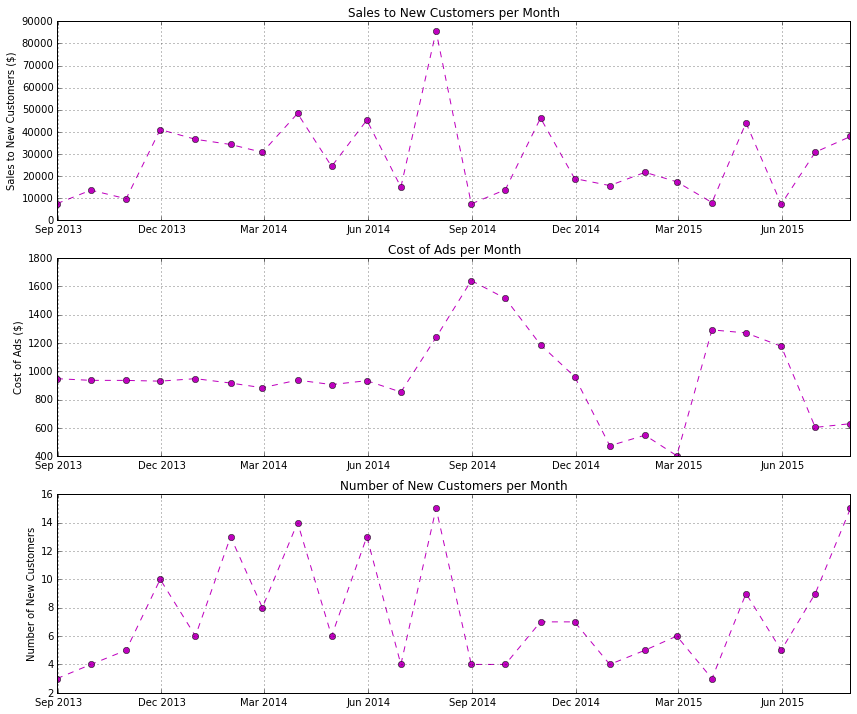

In [100]:
#change figure size
plt.figure(figsize=(12,10)) # in inches, width then height. 

#creating subplots and defining them
# 3 rows, 1 columns, 1st subplot
plt.subplot(3,1,1)      
plt.plot(Combined_df.Date_of_Order, Combined_df.Total_Sales, marker='o', color ='m', linestyle='--')
#Add title
plt.title('Sales to New Customers per Month')
#Add gridlines
plt.grid(True)
#Add axis labels
plt.ylabel('Sales to New Customers ($)')

# 3 rows, 1 columns, 2nd subplot
plt.subplot(3,1,2)      
plt.plot(Combined_df.Date_of_Order, Combined_df.Ad_Cost, marker='o', color ='m', linestyle='--')
#Add title
plt.title('Cost of Ads per Month')
#Add gridlines
plt.grid(True)
#Add axis labels
plt.ylabel('Cost of Ads ($)')

# 3 rows, 1 columns, 3rd subplot
plt.subplot(3,1,3)      
plt.plot(Combined_df.Date_of_Order, Combined_df.New_or_Returning, marker='o', color ='m', linestyle='--')
#Add title
plt.title('Number of New Customers per Month')
#Add gridlines
plt.grid(True)
#Add axis labels
plt.ylabel('Number of New Customers')

# give plots some breathing room
plt.tight_layout()

#show plot
plt.show()



#PLOT 2: Plotting the distribution of sales over the years 2013- 2015 by month. (Instead of plotting Sales, could plot the number of customers. 